In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from deepgd._dependencies import *
from deepgd.tools import *
from deepgd.utils import *
from deepgd.modules import *
from deepgd.data import *
from deepgd.xing import *
from deepgd.ipyjobs import *

In [3]:
G_list = load_G_list(data_path='data/rome', index_file='data_index.txt', cache='G_list', cache_prefix='cache/')

Load from 'cache/G_list.pickle'


In [4]:
data_list = generate_data_list(G_list, 
                               sparse=False, 
                               pivot_mode=None,
                               init_mode='pmds',
                               edge_index='full_edge_index',
                               edge_attr='full_edge_attr',
                               pmds_list=np.load('layouts/rome/pmds.npy', allow_pickle=True),
                               gviz_list=np.load('layouts/rome/gviz.npy', allow_pickle=True),
                               noisy_layout=True,
                               device='cpu', 
                               cache=True,
                               cache_prefix='cache/')

Load from 'cache/generate_data_list(list,sparse=False,pivot_mode=None,init_mode=pmds,edge_index=full_edge_index,edge_attr=full_edge_attr,pmds_list=ndarray,gviz_list=ndarray,noisy_layout=True,device=cpu).pickle'


In [27]:
pickle.dump(data_list, open('cache/generate_data_list(list,sparse=False,pivot_mode=None,init_mode=pmds,edge_index=full_edge_index,edge_attr=full_edge_attr,pmds_list=ndarray,gviz_list=ndarray,noisy_layout=True,device=cpu).pickle', 'wb'))

In [26]:
data_list[0]

Data(edge_attr=[240, 2], edge_index=[2, 240], edge_pair_index=[4, 210], full_edge_attr=[240, 2], full_edge_index=[2, 240], gt_pos=[16, 2], m=21, n=16, pos=[16, 2], raw_edge_index=[2, 42], x=[16])

In [25]:
for d in tqdm(data_list):
    del d.flip_edges_r
    del d.flip_nodes_r
    del d.movlsq_r
    del d.perturb_r
    del d.phantom_r
    del d.random_normal_r
    del d.random_uniform_r

  0%|          | 0/11531 [00:00<?, ?it/s]

In [11]:
idx = 5

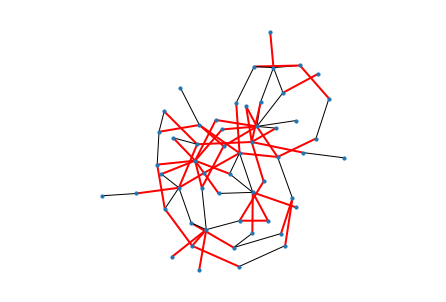

In [12]:
graph_vis(G_list[idx], data_list[idx].gt_pos, 
          highlight_edge=bentley_ottmann_xing(G_list[idx], data_list[idx].gt_pos), 
          with_labels=False,
          node_size=10)

In [13]:
batch = Batch.from_data_list(data_list[:1000])
get_num_xing(batch.gt_pos, batch)

tensor([  3,  14,  24,   8,  13,  49,   4,   0,  48,   2,   4,  10,   7,   0,
         82,  15, 105,   0,   0,  28,  29,  46,   7,  82, 120,   0,   2,  15,
         82,  13,   0,   5,  48,  20,  61,   2,  56,   3,  29,  49,   2,  85,
         67,  57,  15,  18,  12,  11,   8,   1,   3,  77,  15,  65,   1,  63,
         81,  22,  77,  75,  21, 143,  24,  32,   0,  55,   3,  38,   0,  26,
        123,  29,  84, 132,  47,  25,   9,  23,  18,  16,   0,  70,  19,   6,
         27,  11,  41,   1, 153,  66,  46,  60,   1,  64,  51,   0,  18,  20,
         72,  60,  19,  93,  82,  32,   9,  64,  30,   7,  78,  17,  16,  54,
          3,   5, 122,  79,  36,  22,  41,   5,  49,  58,  13,   8,  62,  11,
         13,   7,  26,   0,  14,  80,   4, 122,  95,   9,   3,  19, 124, 118,
          5,   2,  43,  10,   1,   0,  11,  48,   2,  41,  10,   8,   8,  45,
          0,  15,  86,   1,  38,  26,  29,  15,  39,   0,   9,  49,  66,   5,
         70,  31,   8,   0,  48,  53,  40, 114,  46,  15,  28, 1

In [194]:
for idx in tqdm(range(1)):
    batch = Batch.from_data_list(data_list[idx:idx+1])
    print(idx, get_num_xing(batch, get_bf_xing(batch, batch.gt_pos, eps=1e-5)).item(), get_n_xing(G_list[idx], data_list[idx].gt_pos))

  0%|          | 0/1 [00:00<?, ?it/s]

0 3 3


3

In [ ]:
vis_xing()

In [153]:
edges = data_list[0].raw_edge_index.T

In [173]:
torch.unique(edges.sort(dim=1).values, dim=0)

tensor([[ 0,  5],
        [ 0,  6],
        [ 0,  8],
        [ 0, 15],
        [ 1, 12],
        [ 2,  6],
        [ 2, 15],
        [ 3,  8],
        [ 3, 10],
        [ 3, 14],
        [ 3, 15],
        [ 4,  8],
        [ 4, 11],
        [ 7, 14],
        [ 9, 11],
        [ 9, 12],
        [ 9, 15],
        [10, 13],
        [11, 13],
        [12, 13],
        [14, 15]])

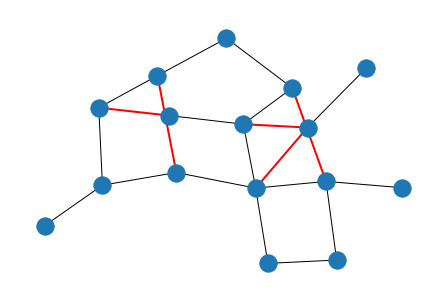

In [304]:
idx = 0
intersections = get_xing(G_list[idx], data_list[idx].gt_pos)#fast_batch_xing([get_seg_list(G_list[idx], data_list[idx].gt_pos)])[0]
vis_xing(G_list[idx], data_list[idx].gt_pos, intersections)
plt.axis('equal')
plt.show()

In [ ]:
layouts = ["gt_pos", "perturb", "phantom", "random_normal", "random_uniform", "flip_edges", "flip_nodes", "movlsq"]

In [17]:
n_xing = list(tqdm(map(get_n_xing, G_list, data_list, [layouts[0]] * len(G_list)), total=len(G_list)))

  0%|          | 0/11531 [00:00<?, ?it/s]

TypeError: get_n_xing() takes 2 positional arguments but 3 were given

In [ ]:
executor = concurrent.futures.ProcessPoolExecutor(16)
for layout in layouts[6:]:
    pos_list = map(lambda d: d[layout], data_list)
    n_xing = list(tqdm(executor.map(get_n_xing, G_list, pos_list), total=len(G_list)))
    np.save(f"num_xing_{layout}.npy", np.array(n_xing))

  0%|          | 0/11531 [00:00<?, ?it/s]

  0%|          | 0/11531 [00:00<?, ?it/s]